In [1]:
pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("Salary Data.csv")
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [20]:
df = pd.DataFrame(data)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [7]:
df["Age"].fillna(df["Age"].mean(),inplace = True)
df["Age"]

NameError: name 'df' is not defined

In [34]:
df["Age"]=df["Age"].astype("int")
df["Age"]

0      32
1      28
2      45
3      36
4      52
       ..
370    35
371    43
372    29
373    34
374    44
Name: Age, Length: 375, dtype: int32

In [38]:
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,15.0,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43,Male,Master's,Director of Operations,19.0,170000.0
372,29,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [44]:
df.drop(["Gender","Education Level","Job Title"],axis=1,inplace =True)

In [46]:
df.isnull().sum()

Age                    0
Years of Experience    2
Salary                 2
dtype: int64

In [48]:
df.dropna(subset=["Years of Experience"], inplace=True)

In [52]:
df.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [56]:
df

,Age,Years of Experience,Salary
0,32,5.0,90000.0
1,28,3.0,65000.0
2,45,15.0,150000.0
3,36,7.0,60000.0
4,52,20.0,200000.0
...,...,...,...
370,35,8.0,85000.0
371,43,19.0,170000.0
372,29,2.0,40000.0
373,34,7.0,90000.0


In [58]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [64]:
df["Age"].corr(df["Salary"])


0.922335243916644

In [66]:
df["Years of Experience"].corr(df["Salary"])

0.9303377227618356

In [68]:
X = df[["Years of Experience"]]
y = df["Salary"]

In [70]:
X.shape,y.shape

((373, 1), (373,))

In [114]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42 )


In [118]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((298, 1), (75, 1), (298,), (75,))

In [120]:
from sklearn.linear_model import LinearRegression

In [122]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [126]:
print("Intercept value(b) :",model.intercept_)


Intercept value(b) : 31521.077620206022


In [130]:
print("Slope : ",model.coef_)

Slope :  [6822.59017499]


In [152]:
y_train_pred = model.predict(X_train)
y_train_pred.shape

(298,)

In [154]:
y_train.shape

(298,)

Text(0.5, 1.0, 'X and Y')

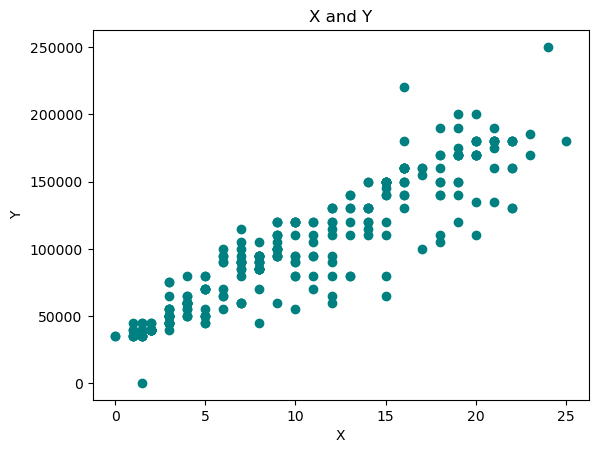

In [160]:
#visualize train result
plt.scatter(X_train,y_train,color = "teal")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X and Y")

Text(0.5, 1.0, 'Regression Line')

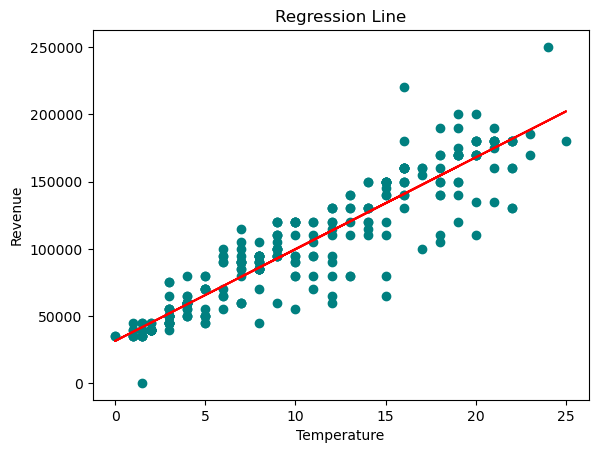

In [142]:
plt.scatter(X_train,y_train,color = "teal")
plt.plot(X_train,y_pred,color = "Red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regression Line")

In [144]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [148]:
MAE = mean_absolute_error(y_train,y_pred)
print("Mean Absolute Error : ",MAE)

MSE = mean_squared_error(y_train,y_pred)
print("Mean squared Error : ",MSE)

print("Root Mean square Error: ",np.sqrt(MSE))
      
r2 = r2_score(y_train,y_pred)
print("r2 Error : ", r2)

Mean Absolute Error :  12783.014491626067
Mean squared Error :  330278674.15368885
Root Mean square Error:  18173.570759586262
r2 Error :  0.8564271861248008


In [164]:
y_test_pred =  model.predict(X_test)


In [166]:
y_test_pred.shape,y_test.shape

((75,), (75,))

In [168]:
MAE = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error : ",MAE)

MSE = mean_squared_error(y_test,y_test_pred)
print("Mean squared Error : ",MSE)

print("Root Mean square Error: ",np.sqrt(MSE))
      
r2 = r2_score(y_test,y_test_pred)
print("r2 Error : ", r2)

Mean Absolute Error :  12094.170341194766
Mean squared Error :  241834883.8999349
Root Mean square Error:  15551.041248094447
r2 Error :  0.8991338517367767
